In [1]:
from src.utils import VideoInterpTripletsDataset
from src.train import trainGAN
from src.eval import evalGAN
from torch.utils.data import DataLoader
from importlib import reload
import time

In [5]:
overfitdataset = VideoInterpTripletsDataset('datasets/Overfit Dataset/',read_frames=False)
dataloaderOverfit = DataLoader(overfitdataset,batch_size=32,shuffle=True,num_workers=0)
print(overfitdataset[0]['left'].shape)

torch.Size([3, 288, 512])


In [4]:
dataset = VideoInterpTripletsDataset('datasets/Full_Dataset_512_small_frames/train_frames', read_frames=True)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=4)

IndexError: list index out of range

In [ ]:
# trainGAN(20, dataloader,savePath="./experiments/20_epochs_0.1_lambda",Supervised=True)
trainGAN(20, dataloaderOverfit,savePath="./experiments/Overfit_20_epochs_0.1_lambda",Supervised=True)


Training GAN
Video (h,w): (512, 288)
Created models
Initialized weights
Set up models
Index for sample: 206


In [7]:
valset = VideoInterpTripletsDataset('datasets/Full_Dataset_512_small_frames/val_frames',read_frames=True)
valloader = DataLoader(valset,batch_size=32,shuffle=True,num_workers=4)

HBox(children=(IntProgress(value=0, max=277), HTML(value='')))

hit
./experiments/512_Small_SGAN_val_generated.png
./experiments/512_Small_SGAN_val_real.png

Avg. PNSR:18.6325 dB


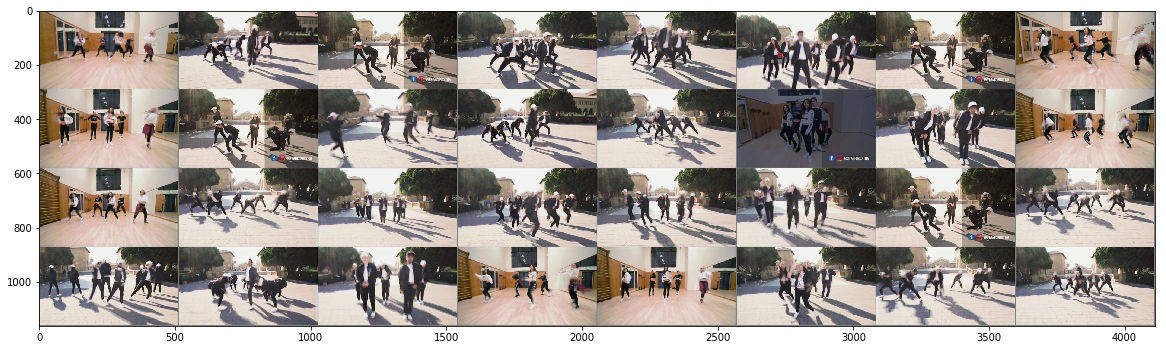

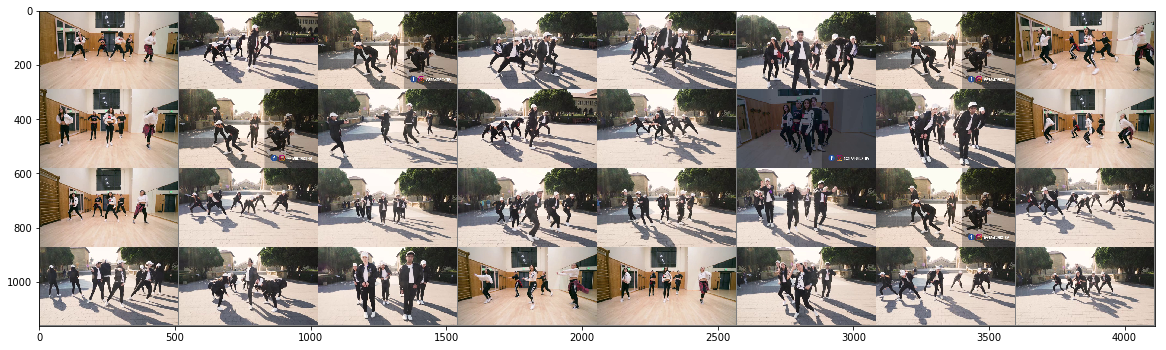

In [7]:
evalGAN(valloader,"./models/512_Small_Test_SGAN",sampleImagesName="512_Small_SGAN_val")

In [8]:
testset = VideoInterpTripletsDataset('datasets/Full_Dataset_512_small_frames/test_frames',read_frames=True)
testloader  = DataLoader(testset,batch_size=32,shuffle=True,num_workers=4)

HBox(children=(IntProgress(value=0, max=204), HTML(value='')))

hit
./experiments/512_Small_SGAN_test_generated.png
./experiments/512_Small_SGAN_test_real.png

Avg. PNSR:17.3404 dB


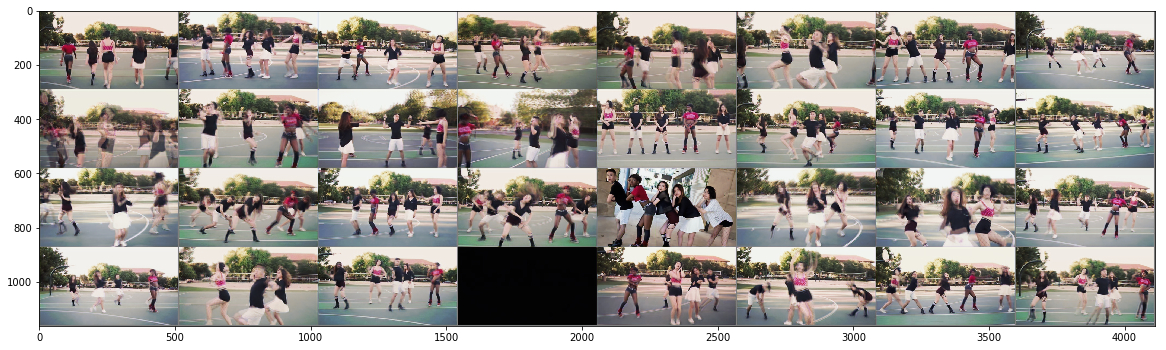

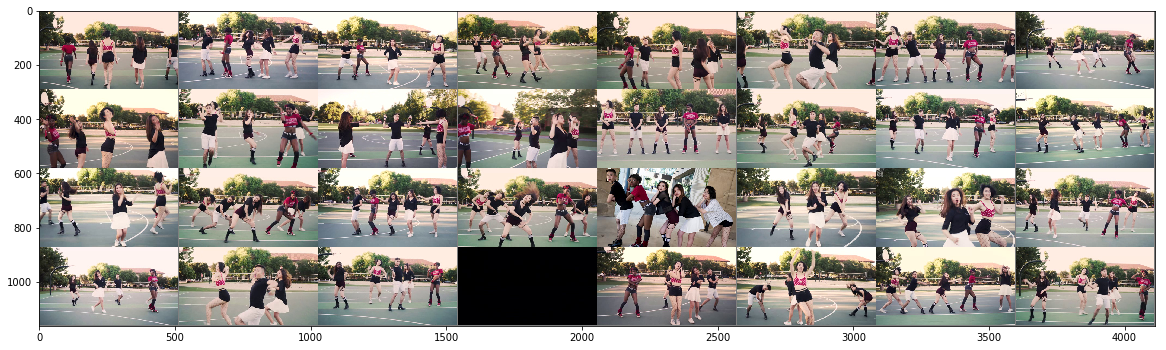

In [8]:
evalGAN(testloader,"./models/512_Small_Test_SGAN",sampleImagesName="512_Small_SGAN_test")